In [1]:
# use print only as a function
from __future__ import print_function
import sys
sys.version_info
#pd.show_versions()

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [2]:
__author__ = 'swe03'

import argparse

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.graphics.api import qqplot

from scipy import stats

desired_width = 400
pd.set_option('display.width',desired_width)

In [3]:
#!pip install seaborn

In [4]:
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#!pip install pandasql
from pandasql import PandaSQL 
pdsql = PandaSQL()

##### Read the BQ tables created in the Dst Addr and Port profile 1 or Iterate and Create ADS's 1 programs

In [6]:
#!pip install google-api-python-client
ent_calc_df1 = pd.read_gbq("select * from prod.calc_ent2_3_all", project_id="network-sec-analytics")
#ent_calc_df1[250:310]

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 336 rows.

Total time taken 1.52 s.
Finished at 2017-04-21 14:52:46.


In [12]:
ent_calc_df1=ent_calc_df1.sort_values(['date_hour'],ascending=True)
ent_calc_df1.reset_index(level=0, drop=True, inplace=True)
#ent_calc_df1[250:364]
ent_calc_df1

,level_0,index,date_hour,dst_addr_datehour_group,total_dst_addr_cnt,ent1,ln_ent1,hx_ent,unq_dst_host_count,unq_src_dst_addr_cnt,In_degree_entropy
0,0,192,2017-02-05 00:00:00.000000,2017-02-05 00,10,0.100000,-2.302585,-0.874034,3,5,0.795580
1,1,115,2017-02-05 01:00:00.000000,2017-02-05 01,7,0.285714,-1.252763,-0.993852,3,5,0.904643
2,2,233,2017-02-05 02:00:00.000000,2017-02-05 02,10,0.200000,-1.609438,-0.965663,3,6,0.878984
3,3,138,2017-02-05 03:00:00.000000,2017-02-05 03,11,0.090909,-2.397895,-1.055889,4,6,0.761663
4,4,268,2017-02-05 04:00:00.000000,2017-02-05 04,9,0.222222,-1.504077,-1.156751,4,6,0.834419
5,5,254,2017-02-05 05:00:00.000000,2017-02-05 05,5,0.400000,-0.916291,-0.688404,2,3,0.993157
6,6,157,2017-02-05 06:00:00.000000,2017-02-05 06,13,0.076923,-2.564949,-0.682577,3,4,0.621309
7,7,124,2017-02-05 07:00:00.000000,2017-02-05 07,7,0.285714,-1.252763,-0.913907,3,4,0.831874
8,8,164,2017-02-05 08:00:00.000000,2017-02-05 08,12,0.166667,-1.791759,-1.011404,4,6,0.729574
9,9,73,2017-02-05 09:00:00.000000,2017-02-05 09,18,0.055556,-2.890372,-0.809425,4,6,0.583876


##### Execute some Univariate Statistics

In [25]:
print(ent_calc_df1['In_degree_entropy'].describe())
print(ent_calc_df1['total_dst_addr_cnt'].describe())
print(ent_calc_df1['unq_dst_host_count'].describe())
print(ent_calc_df1['unq_src_dst_addr_cnt'].describe())

count    336.000000
mean       0.875937
std        0.090795
min        0.583876
25%        0.800000
50%        0.876977
75%        0.938488
max        1.056642
Name: In_degree_entropy, dtype: float64
count    336.000000
mean       7.196429
std        2.787518
min        2.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       18.000000
Name: total_dst_addr_cnt, dtype: float64
count    336.000000
mean       3.050595
std        0.810638
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: unq_dst_host_count, dtype: float64
count    336.000000
mean       4.443452
std        1.381029
min        1.000000
25%        3.750000
50%        4.000000
75%        5.000000
max        8.000000
Name: unq_src_dst_addr_cnt, dtype: float64


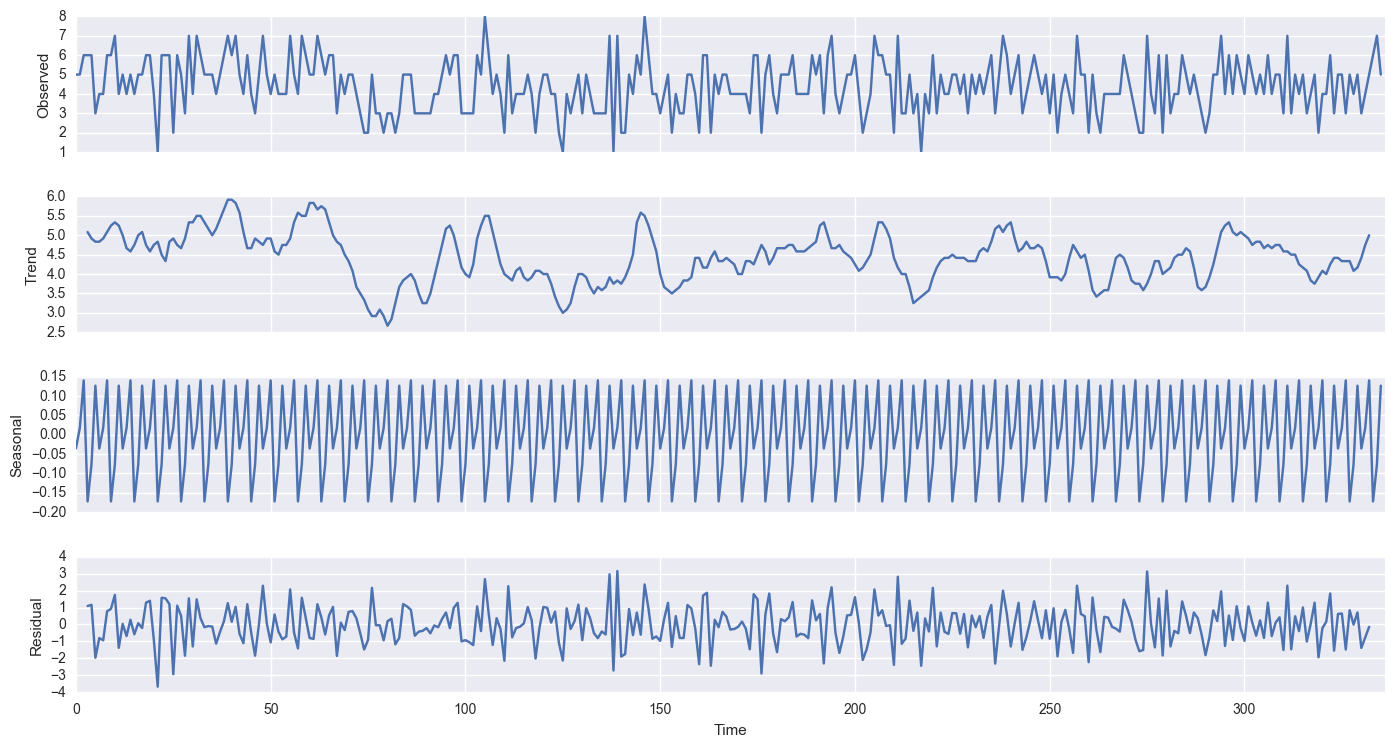

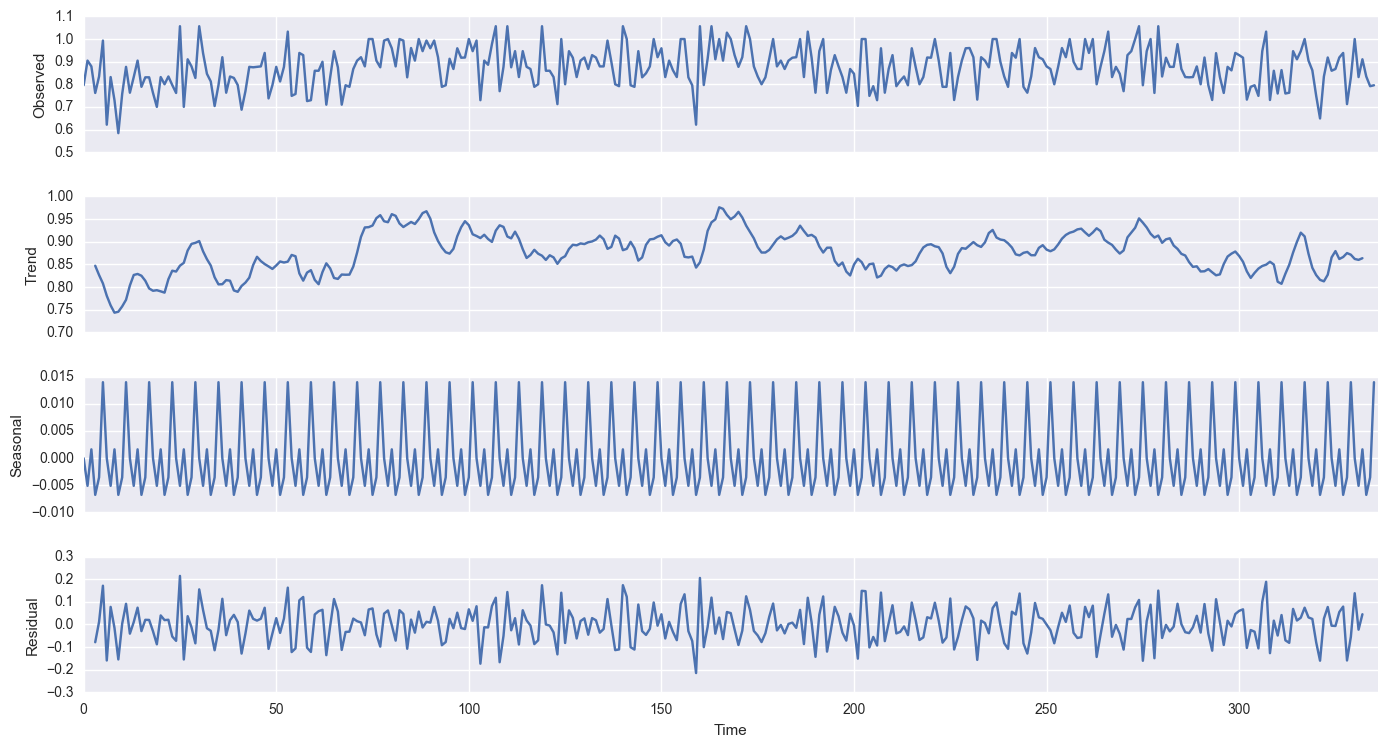

In [20]:
decomposition_src = seasonal_decompose(ent_calc_df1['unq_src_dst_addr_cnt'].values,freq=6)  
decomposition_ent = seasonal_decompose(ent_calc_df1['In_degree_entropy'].values,freq=6)  

#print(decomposition_src.observed)
fig = decomposition_src.plot()  
fig.set_size_inches(15, 8)

#print(decomposition_ent.observed)
fig = decomposition_ent.plot()  
fig.set_size_inches(15, 8)

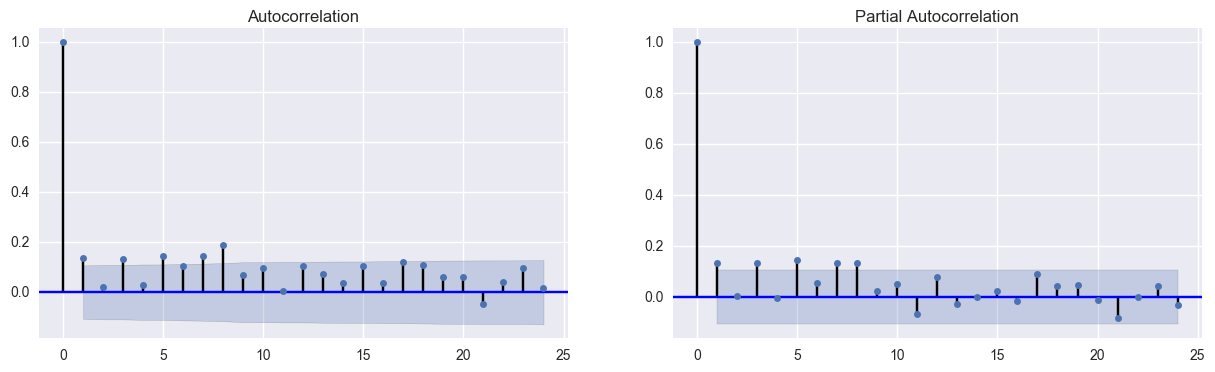

In [55]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(ent_calc_df1['In_degree_entropy'], lags=24, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(ent_calc_df1['In_degree_entropy'], lags=24, ax=axes[1])

If time_varying_reg is True then mle_reg must be False (see SARIMAX notes) 
exog=p53_ts['bytes_mean'], time_varying_regression=False, mle_regression=True)
mod.fit(trend=c)  This is the constant (i.e., intercept)  but so is...
SARIMAX(..... trend='c'). This puts the intercept in the table below and changes the coeff's but not the forecast.
It appears that the add_constant function enables you to calculate an intercept as part of the dynamic regressors
 in the exog regressor set.
168 Hours in a Week.  672(4 Wks) - 168(1 Wk) = 504 Hours(i.e., 3 Weeks for Model Fit). 168 is the Holdout Sample
Needed to add the "enforce_" parameters since incrementing the AR parm to 4 was causing error messages
These some additional parameters when subsetting with the index
  (p53_ts['count'].ix[0:672], enforce_stationarity=False,enforce_invertibility=False,

,enforce_stationarity=False,enforce_invertibility=False
,exog=(p53_ts['bytes_mean']))    
,exog=(exog2)
    
mod = sm.tsa.statespace.SARIMAX(p53_ts['count'],trend='n',order=(2,0,5),seasonal_order=(3,0,0,24)

In [26]:
mod = sm.tsa.statespace.SARIMAX(ent_calc_df1['unq_src_dst_addr_cnt'], 
      order=(9,1,0), seasonal_order=(0,0,0,24))
mod1 = sm.tsa.statespace.SARIMAX(ent_calc_df1['In_degree_entropy'], 
      order=(1,1,0), seasonal_order=(2,0,0,24))
mod2 = sm.tsa.statespace.SARIMAX(ent_calc_df1['In_degree_entropy'], 
     trend='n', order=(1,0,0), seasonal_order=(2,0,0,24))
results = mod.fit()
print(results.summary())                                

                            Statespace Model Results                            
Dep. Variable:     unq_src_dst_addr_cnt   No. Observations:                  336
Model:                 SARIMAX(9, 1, 0)   Log Likelihood                -581.003
Date:                  Fri, 21 Apr 2017   AIC                           1182.006
Time:                          17:22:47   BIC                           1220.177
Sample:                               0   HQIC                          1197.222
                                  - 336                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8906      0.053    -16.765      0.000      -0.995      -0.787
ar.L2         -0.7347      0.076     -9.730      0.000      -0.883      -0.587
ar.L3         -0.6539      0.083    

In [27]:
# This is just a SARIMAX Results Wrapper.  It collects the model parameters for later use.
res = mod.filter(results.params)

In [28]:
predict_res = res.predict(alpha=0.05, start=337, end=338, dynamic=5)
#predict_res = res.predict()
predict_res

/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1720: ValueWarning: Dynamic prediction specified to begin after the end of prediction, and so has no effect.
  ' prediction, and so has no effect.', ValueWarning)


337    4.668971
338    4.497194
dtype: float64

In [57]:
# In-sample one-step-ahead predictions
#predict = res.get_prediction(start=1, end=350)
predict = res.get_prediction(start=337, end=338)
predict_ci = predict.conf_int()
predict_ci

,lower unq_src_dst_addr_cnt,upper unq_src_dst_addr_cnt
337,1.972963,7.364979
338,1.763875,7.230512


In [50]:
predict.predicted_mean

1      4.999991
2      4.999996
3      5.324796
4      5.581347
5      5.681294
6      5.076875
7      4.678888
8      4.600221
9      5.072907
10     5.394454
11     5.705813
12     5.145109
13     4.826993
14     4.627463
15     4.696196
16     4.935314
17     5.253795
18     5.100375
19     5.202061
20     5.194718
21     4.846434
22     4.243507
23     4.244737
24     4.916093
25     5.247142
26     5.025413
27     4.681985
28     4.287970
29     4.624841
30     4.712358
         ...   
321    4.187313
322    3.995170
323    4.242736
324    4.075643
325    4.324788
326    3.829315
327    4.033829
328    4.061533
329    4.289423
330    4.267082
331    4.292663
332    4.470369
333    3.946194
334    4.686533
335    4.874110
336    4.895417
337    4.668971
338    4.497194
339    4.758450
340    4.792777
341    5.284189
342    5.250871
343    5.265393
344    5.239347
345    4.928236
346    4.921524
347    4.878922
348    4.949624
349    5.026429
350    5.063770
dtype: float64

In [51]:
#predict_dy.predicted_mean.astype(int)
predict.predicted_mean.ix[1:350] 

1      4.999991
2      4.999996
3      5.324796
4      5.581347
5      5.681294
6      5.076875
7      4.678888
8      4.600221
9      5.072907
10     5.394454
11     5.705813
12     5.145109
13     4.826993
14     4.627463
15     4.696196
16     4.935314
17     5.253795
18     5.100375
19     5.202061
20     5.194718
21     4.846434
22     4.243507
23     4.244737
24     4.916093
25     5.247142
26     5.025413
27     4.681985
28     4.287970
29     4.624841
30     4.712358
         ...   
321    4.187313
322    3.995170
323    4.242736
324    4.075643
325    4.324788
326    3.829315
327    4.033829
328    4.061533
329    4.289423
330    4.267082
331    4.292663
332    4.470369
333    3.946194
334    4.686533
335    4.874110
336    4.895417
337    4.668971
338    4.497194
339    4.758450
340    4.792777
341    5.284189
342    5.250871
343    5.265393
344    5.239347
345    4.928236
346    4.921524
347    4.878922
348    4.949624
349    5.026429
350    5.063770
dtype: float64

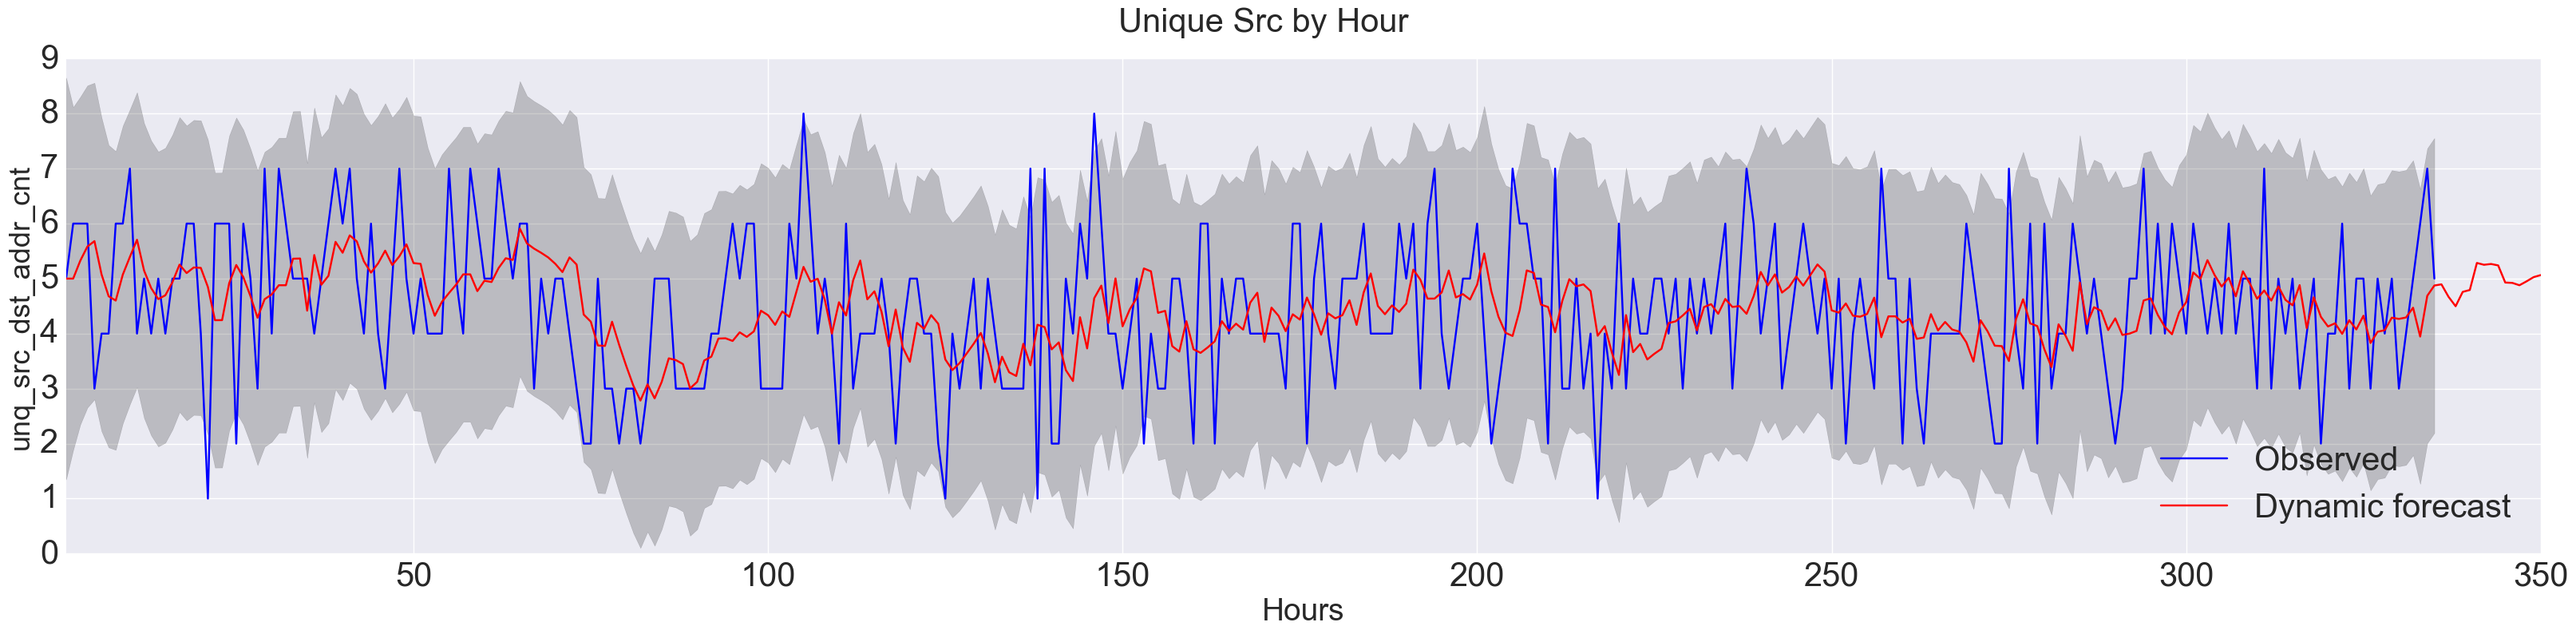

In [52]:
## This is all controlled with the code block above:
# Dynamic predictions
predict_dy = res.get_prediction()
predict_dy_ci = predict_dy.conf_int()

# Graph
fig, ax = plt.subplots(figsize=(40,8))
npre = 4
#ax.set(title='Count of Packets by Hour', xlabel='Hour', ylabel='Count')
fig.suptitle('Unique Src by Hour', fontsize=30)
plt.xlabel('Hours', fontsize=28)   # The fontsize here is applied to the df variable name not the label in the function
plt.ylabel('unq_src_dst_addr_cnt', fontsize=26)

# Plot data points
ent_calc_df1.ix[1:350,'unq_src_dst_addr_cnt'].plot(ax=ax, style='blue', label='Observed')  # 650 is '12.17.2016 02:00:00'

# Plot predictions
predict.predicted_mean.ix[1:350].plot(ax=ax, style='r', label='Dynamic forecast', fontsize=30)
ci = predict_dy_ci.ix[1:350]
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='black', alpha=0.2)

legend = ax.legend(loc='lower right', fontsize=30)

In [80]:
## Values are between 0 and 4.  Values close to 2: no Serial Correlation. Close to 0: Pos Corr. Close to 4: Neg Corr.
sm.stats.durbin_watson(results.resid.values)

1.7662290097524036

In [81]:
## This df is used below 
resid1 = results.resid

In [82]:
#If the p-val is very small, it means it is unlikely that the data came from a normal distribution
stats.normaltest(resid1)

NormaltestResult(statistic=145.95498361415437, pvalue=2.0243145890751316e-32)

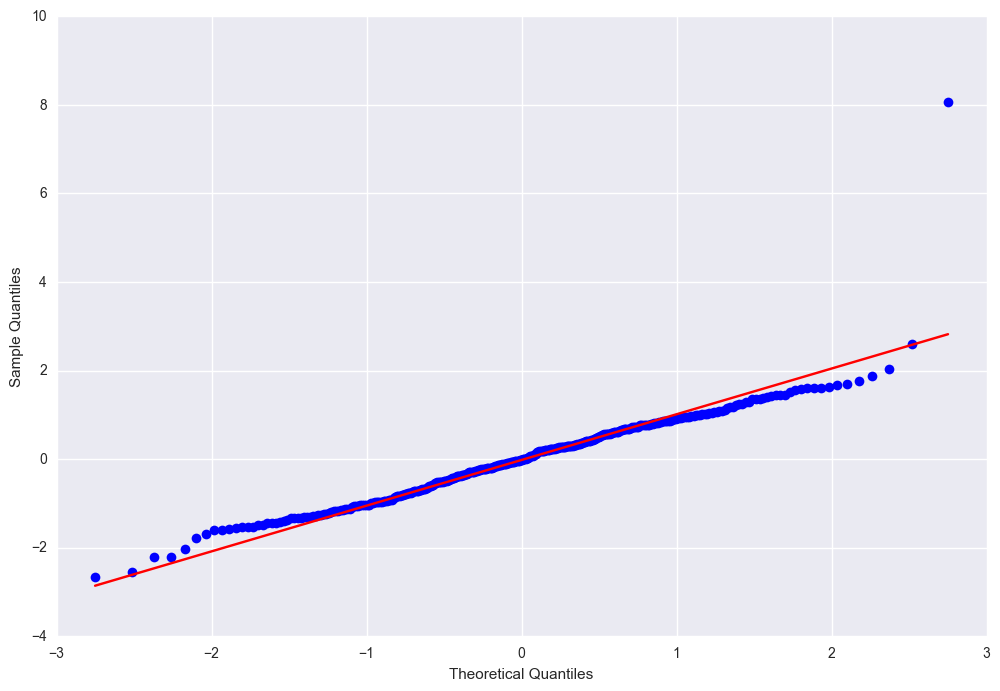

In [83]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

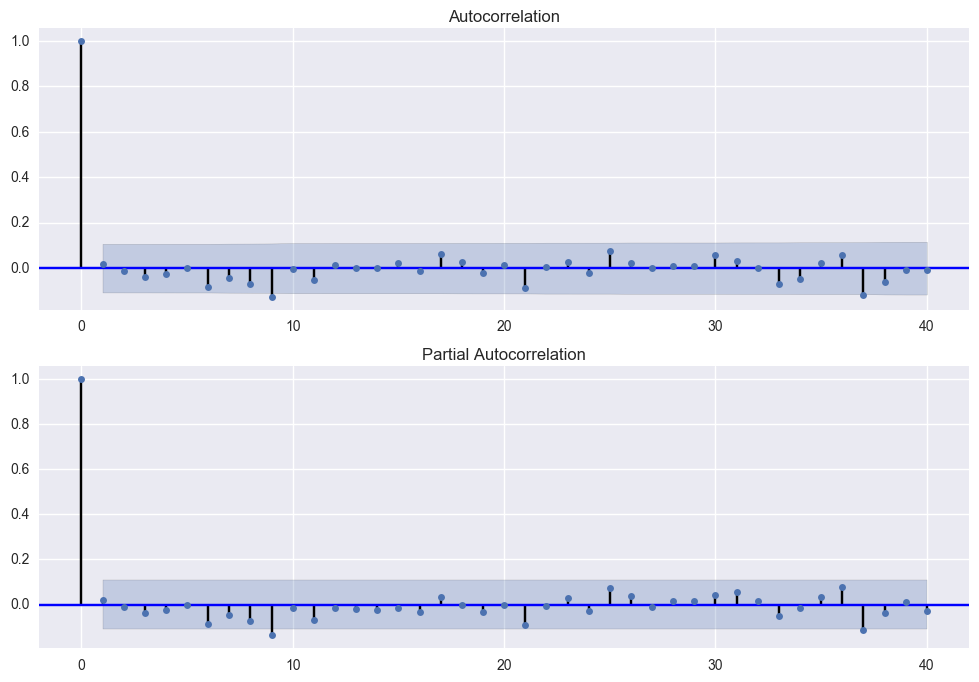

In [84]:
# Graph the acf and pacf for the Residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

In [85]:
# Box-Pierce Q statistic tests the Null Ho that *ALL* correlations up to Lag K are equal to Zero.  This is not the 
# same as the correlogram above.
r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.018436   0.115219  0.734279
2.0  -0.010811   0.154959  0.925446
3.0  -0.040055   0.702132  0.872702
4.0  -0.023737   0.894873  0.925295
5.0  -0.001499   0.895644  0.970536
6.0  -0.083297   3.283463  0.772520
7.0  -0.045567   4.000214  0.779753
8.0  -0.069773   5.685835  0.682375
9.0  -0.128377  11.409578  0.248675
10.0 -0.005151  11.418820  0.325832
11.0 -0.052566  12.384394  0.335454
12.0  0.012178  12.436375  0.411300
13.0  0.002687  12.438913  0.492023
14.0  0.001676  12.439904  0.571020
15.0  0.021633  12.605476  0.632741
16.0 -0.011509  12.652482  0.697977
17.0  0.064368  14.127546  0.658054
18.0  0.026853  14.385064  0.703667
19.0 -0.019326  14.518874  0.752647
20.0  0.013571  14.585063  0.799638
21.0 -0.087793  17.363930  0.688823
22.0  0.006248  17.378047  0.742161
23.0  0.027693  17.656303  0.775856
24.0 -0.020377  17.807451  0.812248
25.0  0.075450  19.886271  0.752765
26.0  0.024304  20.102675  0

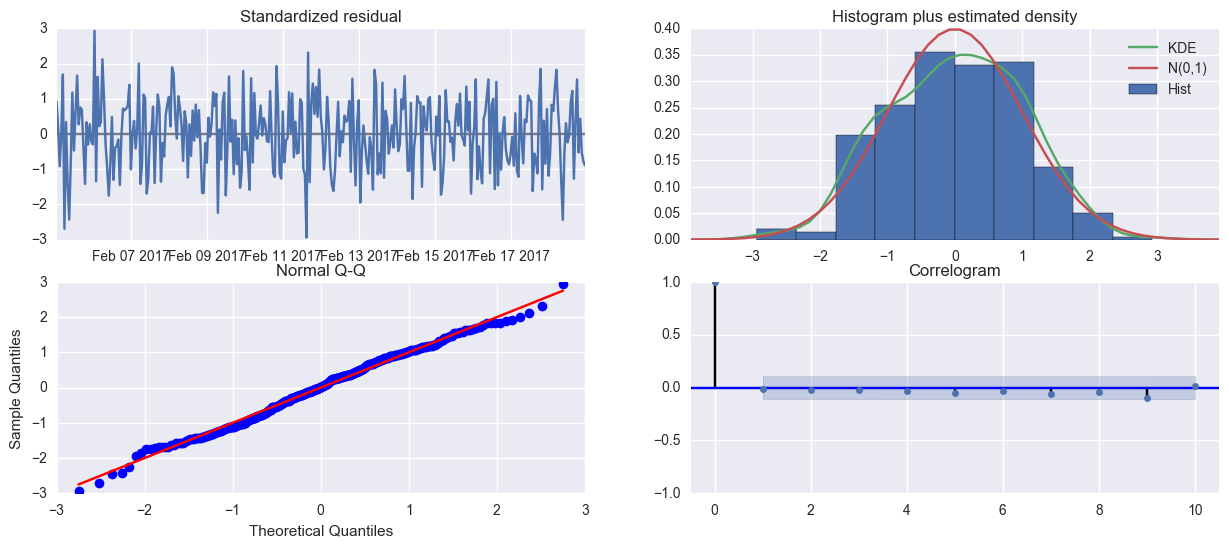

In [86]:
fig = results.plot_diagnostics()

In [91]:
#ci.ix[:,0]  # This is a series. It is the "lower count" text cell
#ci.ix[:,1]   # This is a series.  It is the "upper count" text cell
#ci.ix[:]      # This displays both display cells "lower count"|"upper count"
predict_ci.index

DatetimeIndex(['2017-02-19 01:00:00', '2017-02-19 02:00:00'], dtype='datetime64[ns]', freq='H')

In [92]:
predict_ci.info

<bound method DataFrame.info of                      lower In_degree_entropy  upper In_degree_entropy
2017-02-19 01:00:00                 0.686161                 1.035213
2017-02-19 02:00:00                 0.692030                 1.041094>

In [93]:
predict_ci.ix[:,0]

2017-02-19 01:00:00    0.686161
2017-02-19 02:00:00    0.692030
Freq: H, Name: lower In_degree_entropy, dtype: float64

In [94]:
predict_ci.ix[:,1]

2017-02-19 01:00:00    1.035213
2017-02-19 02:00:00    1.041094
Freq: H, Name: upper In_degree_entropy, dtype: float64

In [95]:
predict_ci.ix[1,1]

1.041093891129057

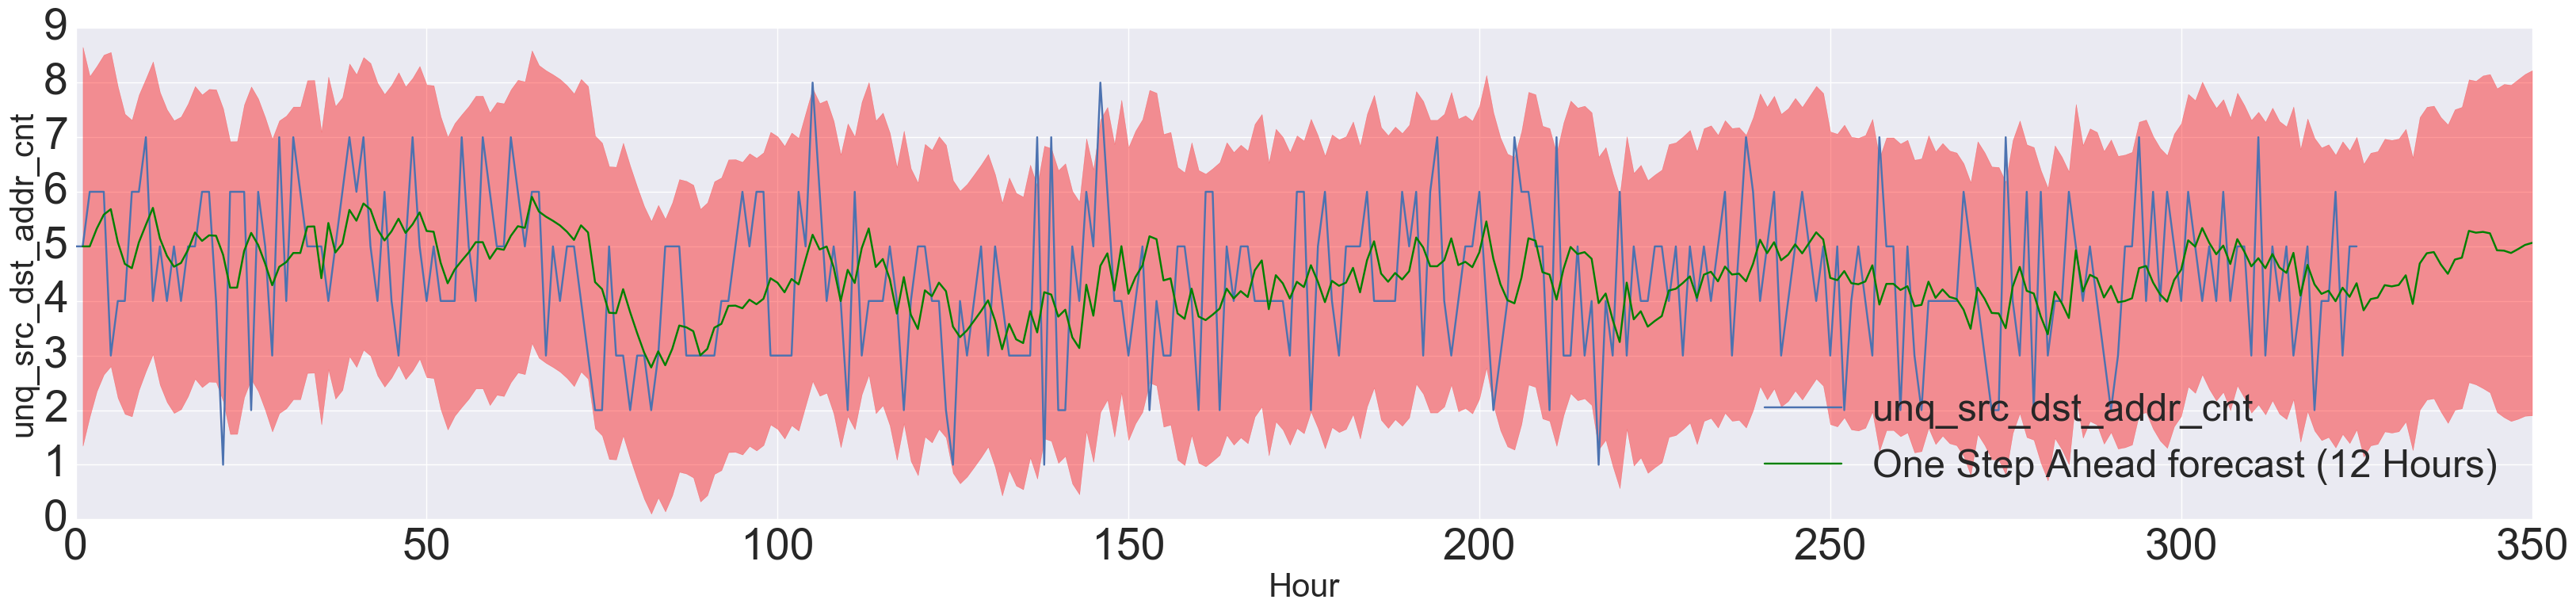

In [56]:
# Plot predictions
# These are the two predicted Count values with the date/time (2016-12-18 00:00:00    51.207925)
# It is the same as [0:2] start at 0 and stop at 1
#predict.predicted_mean.ix[:].plot(ax=ax,  label='One-step-ahead forecast')  ## This is redundant with below

ci = predict_ci.ix[:]  # ci is the display labels and values for the Upper and Lower bounds 

fig, ax = plt.subplots(figsize=(40, 8))
plt.xlabel('Hour',fontsize=30)
plt.ylabel('unq_src_dst_addr_cnt',fontsize=30)
ax = ent_calc_df1['unq_src_dst_addr_cnt'].ix[:325].plot(ax=ax)   

# :,0 - Lower :,1 - Upper values by hour
# alpha is transparency value.  Higher is less transparent
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='r', alpha=0.40)  

predict.predicted_mean.ix[:].plot(ax=ax, style='g', label='One Step Ahead forecast (12 Hours)', fontsize=40)
#ci = predict_ci.ix[:]
#ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='g', alpha=0.1)  # This displays the "Upper Count" "Lower Count"

legend = ax.legend(loc='lower right',fontsize=35)